In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [2]:
def runge(f, t, u0):
    # Runge / improved Euler method
    # f  : rhs function: R x R^m -> R^m
    # t  : vector of discrete time points
    # u0 : R^m vector of initial values
    # returns
    # U  : U[:,j] solution at time point t[j]
    
    n = len(t)
    m = len(u0)
    U = zeros((m,n))
    U[:,0] = u0
    
    for j in range(n-1):
        h  = t[j+1]-t[j]
        k1 = f(t[j], U[:,j])
        k2 = f(t[j]+h/2, U[:,j]+h/2*k1)
        U[:,j+1] = U[:,j] + h*k2
        
    return U

In [30]:
def euler(f, t, u0):
    # Euler method
    # f  : rhs function: R x R^m -> R^m
    # t  : vector of discrete time points
    # u0 : R^m vector of initial values
    # returns
    # U  : U[:,j] solution at time point t[j]
    
    n = len(t)
    m = len(u0)
    U = zeros((m,n))
    U[:,0] = u0
    
    for j in range(n-1):
        h  = t[j+1]-t[j]
        k1 = f(t[j], U[:,j])
        U[:,j+1] = U[:,j] + h*k1
        
    return U

In [35]:
# van der Pol
def f(t,u): 
    return array([u[1], 40*(1-u[0]**2)*u[1]-u[0]])


IV = [0.1, 0.0]

# Time horizon
T = 200

# Time step 
dt = 0.01
t = arange(0,T+dt/2, dt)

In [36]:
U = runge(f,t,IV)
V = euler(f,t,IV)

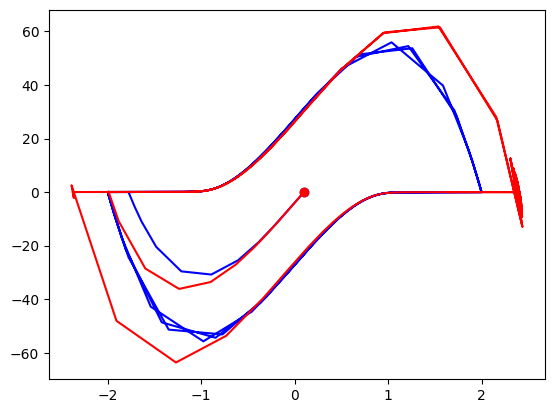

In [37]:
plt.plot(U[0,:], U[1,:], 'b-')
plt.plot(U[0,0], U[1,0], 'bo')

plt.plot(V[0,:], V[1,:], 'r-')
plt.plot(V[0,0], V[1,0], 'ro')